In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

Load all oulad files

In [5]:


studentInfo_df     = pd.read_csv('studentInfo.csv')
assessments_df     = pd.read_csv('assessments.csv')
studAssessments_df = pd.read_csv('studentAssessment.csv')
studentVle_df      = pd.read_csv('studentVle.csv')
vle_df             = pd.read_csv('vle.csv')

studentInfo_df.info()
studentInfo_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


View virtual learning environment (VLE) site browsing data

In [6]:
vle_df[~vle_df["week_from"].isna()]

,id_site,code_module,code_presentation,activity_type,week_from,week_to
113,546732,AAA,2013J,oucontent,2.0,2.0
198,546719,AAA,2013J,oucontent,1.0,1.0
210,546681,AAA,2013J,oucontent,1.0,1.0
264,877040,AAA,2014J,oucontent,2.0,2.0
323,877045,AAA,2014J,oucontent,1.0,1.0
...,...,...,...,...,...,...
6243,798728,GGG,2014B,resource,1.0,1.0
6266,897051,GGG,2014J,resource,2.0,2.0
6285,897121,GGG,2014J,resource,1.0,1.0
6304,897050,GGG,2014J,resource,1.0,1.0


Compute average click per student per site per module per presentation

In [7]:
avg_per_site = studentVle_df.groupby(["id_student","id_site","code_module","code_presentation"]).mean().reset_index()
avg_per_site.info()
avg_per_site.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960496 entries, 0 to 1960495
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   id_student         int64  
 1   id_site            int64  
 2   code_module        object 
 3   code_presentation  object 
 4   date               float64
 5   sum_click          float64
dtypes: float64(2), int64(2), object(2)
memory usage: 89.7+ MB


,id_student,id_site,code_module,code_presentation,date,sum_click
0,6516,877011,AAA,2014J,210.333333,3.833333
1,6516,877012,AAA,2014J,90.833333,2.310606
2,6516,877015,AAA,2014J,113.461538,2.000000
3,6516,877023,AAA,2014J,122.666667,2.000000
4,6516,877025,AAA,2014J,41.142857,4.333333


Compute average click per student per module per presentation

In [9]:
avg_per_student = avg_per_site.groupby(["id_student","code_module","code_presentation"]).mean()[["date","sum_click"]].reset_index()
avg_per_student.info()
avg_per_student.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29228 entries, 0 to 29227
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_student         29228 non-null  int64  
 1   code_module        29228 non-null  object 
 2   code_presentation  29228 non-null  object 
 3   date               29228 non-null  float64
 4   sum_click          29228 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ MB


,id_student,code_module,code_presentation,date,sum_click
0,6516,AAA,2014J,105.292573,5.816135
1,8462,DDD,2013J,38.794704,1.734524
2,8462,DDD,2014J,10.000000,3.000000
3,11391,AAA,2013J,111.739069,4.231515
4,23629,BBB,2013B,33.409632,2.817316


Finally, combine the student info and engineered VLE features. We will use this for clustering

In [10]:
final_df = pd.merge(studentInfo_df, avg_per_student, how="inner", on=["id_student","code_module","code_presentation"])

final_df.drop(["id_student","code_module","code_presentation"], axis = 1, inplace = True)

final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  object 
 1   region                29228 non-null  object 
 2   highest_education     29228 non-null  object 
 3   imd_band              28174 non-null  object 
 4   age_band              29228 non-null  object 
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  object 
 8   final_result          29228 non-null  object 
 9   date                  29228 non-null  float64
 10  sum_click             29228 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,111.739069,4.231515
1,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,92.532356,3.541379
2,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,2.571795,3.588112
3,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,99.678124,3.658979
4,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,99.220225,2.821116


In [12]:
final_df.describe()

,num_of_prev_attempts,studied_credits,date,sum_click
count,29228.000000,29228.000000,29228.000000,29228.000000
mean,0.158512,77.987204,72.265376,2.575613
std,0.472554,39.466858,45.275393,1.064536
min,0.000000,30.000000,-25.000000,1.000000
25%,0.000000,60.000000,29.582484,1.758813
50%,0.000000,60.000000,83.014196,2.324867
75%,0.000000,90.000000,106.489264,3.205855
max,6.000000,630.000000,239.947024,28.440018


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  object 
 1   region                29228 non-null  object 
 2   highest_education     29228 non-null  object 
 3   imd_band              28174 non-null  object 
 4   age_band              29228 non-null  object 
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  object 
 8   final_result          29228 non-null  object 
 9   date                  29228 non-null  float64
 10  sum_click             29228 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


Encode the categorical data columns as numeric columns for input to the clustering algorithms

In [14]:
from sklearn.preprocessing import LabelEncoder

enc_final_df = final_df.copy()

cols_to_encode = ['gender', 'region', 'highest_education', 
                  'imd_band', 'age_band', 'disability', 
                  'final_result']

# Encode categorical data
enc_final_df[cols_to_encode] = enc_final_df[cols_to_encode].apply(LabelEncoder().fit_transform)

enc_final_df.info()
enc_final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  int32  
 1   region                29228 non-null  int32  
 2   highest_education     29228 non-null  int32  
 3   imd_band              29228 non-null  int32  
 4   age_band              29228 non-null  int32  
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  int32  
 8   final_result          29228 non-null  int32  
 9   date                  29228 non-null  float64
 10  sum_click             29228 non-null  float64
dtypes: float64(2), int32(7), int64(2)
memory usage: 1.9 MB


,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,1,0,1,9,2,0,240,0,2,111.739069,4.231515
1,0,6,1,2,1,0,60,0,2,92.532356,3.541379
2,0,5,0,3,1,0,60,1,3,2.571795,3.588112
3,0,7,0,5,1,0,60,0,2,99.678124,3.658979
4,0,11,2,5,0,0,60,0,2,99.220225,2.821116


Correlation matrix does not indicate strong correlations among the independent variables. There is some correlation between 'date' and 'sum click', 'number of previous attempts' and 'credits taken', 'gender' and 'sum click'. Whereas, the target variable 'final result' has some correlation with 'studied credits' and 'date'. There analysis can give you a basis for setting up hypotheses.

<AxesSubplot:>

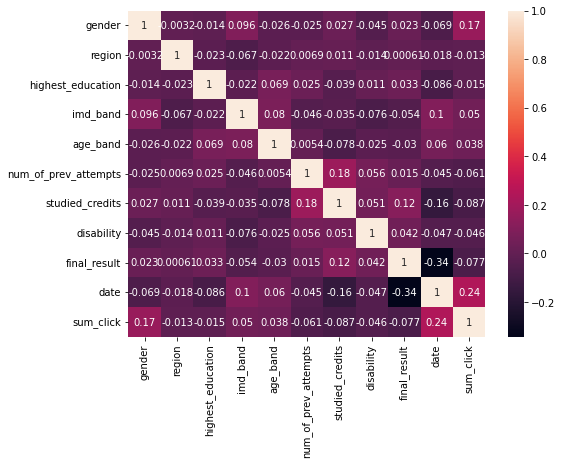

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(enc_final_df.corr(),annot=True)

Get rid of the target variable 'final result'

In [17]:
cols_to_keep = ['gender', 'region', 'highest_education', 
                  'imd_band', 'age_band', 'num_of_prev_attempts', 
                  'studied_credits', 'disability', 
                  'date', 'sum_click']

# Encode categorical data
subset_final_df = enc_final_df[cols_to_keep]

subset_final_df.info()
subset_final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29228 entries, 0 to 29227
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                29228 non-null  int32  
 1   region                29228 non-null  int32  
 2   highest_education     29228 non-null  int32  
 3   imd_band              29228 non-null  int32  
 4   age_band              29228 non-null  int32  
 5   num_of_prev_attempts  29228 non-null  int64  
 6   studied_credits       29228 non-null  int64  
 7   disability            29228 non-null  int32  
 8   date                  29228 non-null  float64
 9   sum_click             29228 non-null  float64
dtypes: float64(2), int32(6), int64(2)
memory usage: 1.8 MB


,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,sum_click
0,1,0,1,9,2,0,240,0,111.739069,4.231515
1,0,6,1,2,1,0,60,0,92.532356,3.541379
2,0,5,0,3,1,0,60,1,2.571795,3.588112
3,0,7,0,5,1,0,60,0,99.678124,3.658979
4,0,11,2,5,0,0,60,0,99.220225,2.821116


Standardize the data because clustering is generally distance-based, so prone to scale of data points

In [18]:
from sklearn.preprocessing import StandardScaler

cols_to_encode = ['gender', 'region', 'highest_education', 
                  'imd_band', 'age_band', 'num_of_prev_attempts', 
                  'studied_credits', 'disability', 
                  'date', 'sum_click']

# Standardize the data
X = StandardScaler().fit_transform(subset_final_df[cols_to_encode])
X

array([[ 0.8914428 , -1.60121378, -0.00930198, ..., -0.32665273,
         0.87187247,  1.55554191],
       [-1.12177696,  0.02863443, -0.00930198, ..., -0.32665273,
         0.44764551,  0.90723332],
       [-1.12177696, -0.24300694, -1.02757232, ...,  3.06135509,
        -1.53935217,  0.95113392],
       ...,
       [-1.12177696,  0.57191716, -1.02757232, ...,  3.06135509,
         0.97248832,  0.28088756],
       [-1.12177696,  0.3002758 ,  1.00896837, ..., -0.32665273,
        -0.9862136 ,  0.70535012],
       [-1.12177696,  1.65848264, -0.00930198, ..., -0.32665273,
         0.41649492,  0.96673279]])

Perform dimensionality reduction using PCA to end up with important/significant feature vectors/ or components

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(29228, 10)

Determine the number of clusters by using the elbow method

In [20]:
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

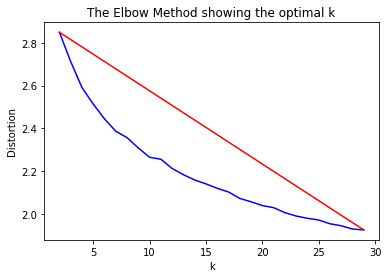

In [30]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Perform kmeans clustering for k = 20, which seems reasonable as there is no apparent elbow in the data

In [21]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
enc_final_df['y'] = y_pred

Compute tsne dimensionality reduction, results in 2 dimensions, pretty useful for 2D visualisation

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X)

C:\Users\Acer\anaconda3\envs\multicons\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Acer\anaconda3\envs\multicons\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 29228 samples in 0.135s...
[t-SNE] Computed neighbors for 29228 samples in 12.614s...
[t-SNE] Computed conditional probabilities for sample 1000 / 29228
[t-SNE] Computed conditional probabilities for sample 2000 / 29228
[t-SNE] Computed conditional probabilities for sample 3000 / 29228
[t-SNE] Computed conditional probabilities for sample 4000 / 29228
[t-SNE] Computed conditional probabilities for sample 5000 / 29228
[t-SNE] Computed conditional probabilities for sample 6000 / 29228
[t-SNE] Computed conditional probabilities for sample 7000 / 29228
[t-SNE] Computed conditional probabilities for sample 8000 / 29228
[t-SNE] Computed conditional probabilities for sample 9000 / 29228
[t-SNE] Computed conditional probabilities for sample 10000 / 29228
[t-SNE] Computed conditional probabilities for sample 11000 / 29228
[t-SNE] Computed conditional probabilities for sample 12000 / 29228
[t-SNE] Computed conditional probabilities for s

Plot the reduced 2D data

C:\Users\Acer\anaconda3\envs\multicons\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


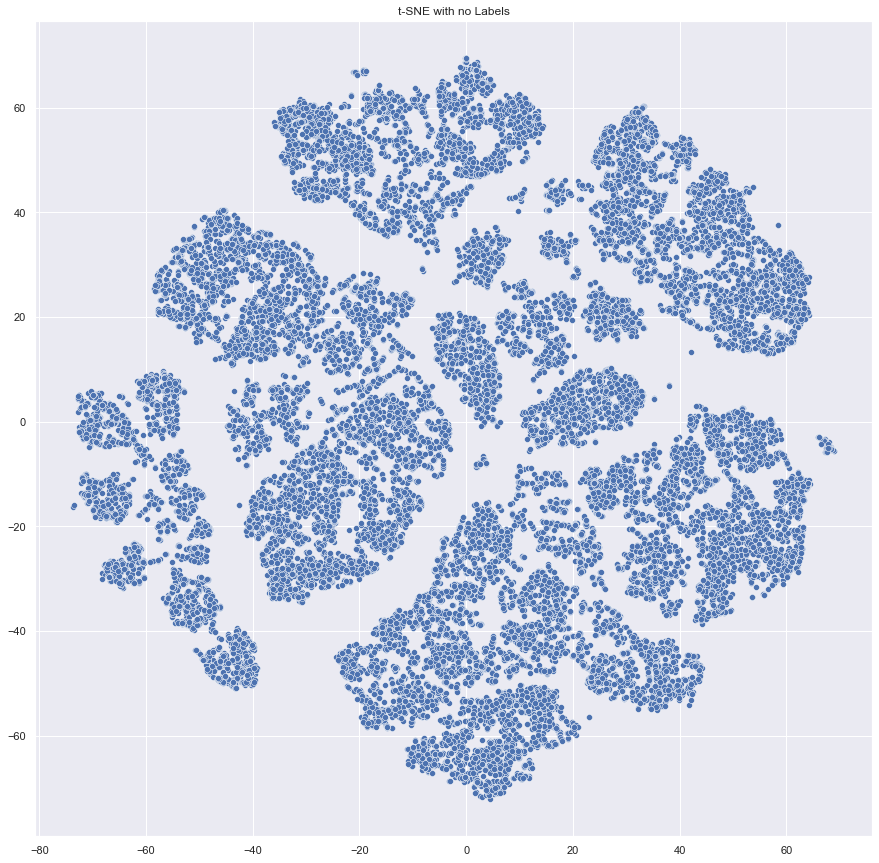

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig("t-sne_oulad.png")
plt.show()

Label the data points with labels from kmeans clustering, by visual inspection it seems like there are clusters in the data

C:\Users\Acer\anaconda3\envs\multicons\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


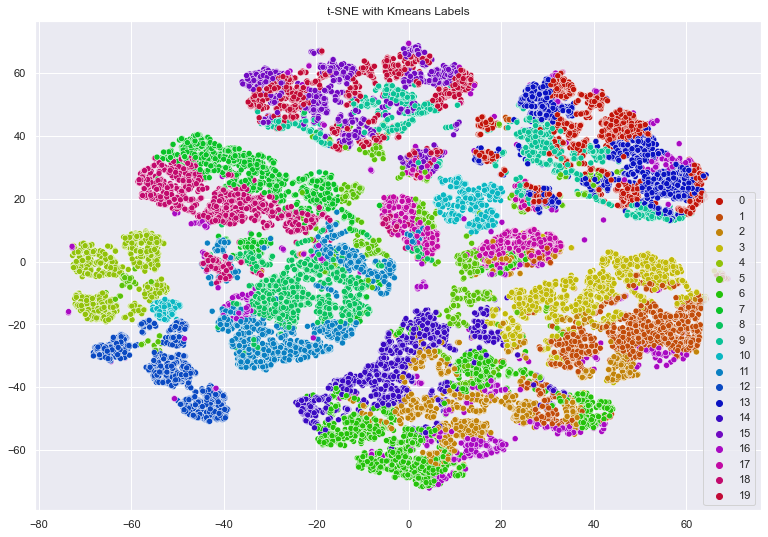

In [26]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

Now label the reduced data points with the dependent/target variable dropout (TRUE/FALSE). Recall the final result is Distinction|Pass|Fail|Withdrawn, we are interested in Withdrawn (to say dropout), so create a data column with dropout value

In [27]:
dropout_df = final_df.final_result == 'Withdrawn'

Label the plot with dropout value. Again by visual inspection there is some relation (or clustering) among dropout students. 

C:\Users\Acer\anaconda3\envs\multicons\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


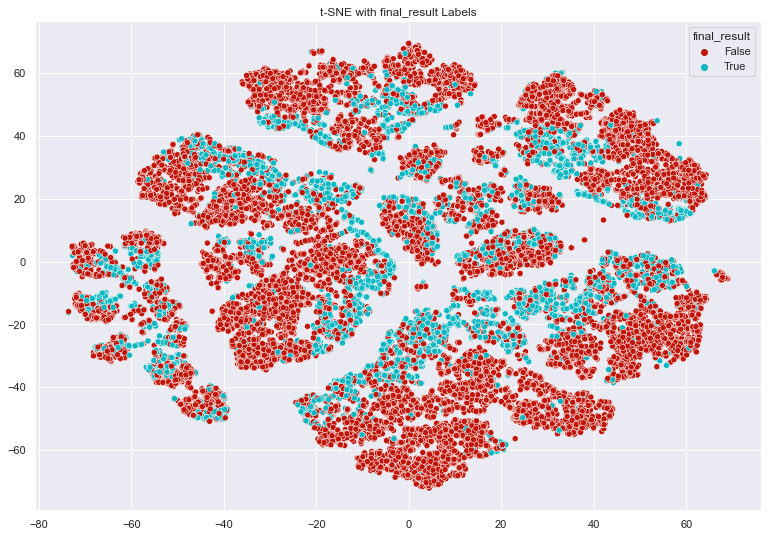

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(2, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=dropout_df, legend='full', palette=palette)
plt.title('t-SNE with final_result Labels')
plt.savefig("improved_cluster_dropout_tsne.png")
plt.show()